In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_excel('BurkinaFaso_Merged.xlsx', sheet_name='Sheet1')

In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20181001,2018,10,201810,854,BFA,Burkina Faso,X,...,694,False,0,False,0.0,2.558431e+07,2.558431e+07,0.0,0.0,1.0
1,C,M,20181001,2018,10,201810,854,BFA,Burkina Faso,X,...,694,False,0,False,0.0,2.558431e+07,2.558431e+07,0.0,1.0,0.0
2,C,M,20181101,2018,11,201811,854,BFA,Burkina Faso,X,...,1223,False,0,False,0.0,4.801119e+07,4.801119e+07,0.0,0.0,1.0
3,C,M,20181101,2018,11,201811,854,BFA,Burkina Faso,X,...,1223,False,0,False,0.0,4.801119e+07,4.801119e+07,0.0,1.0,0.0
4,C,M,20181201,2018,12,201812,854,BFA,Burkina Faso,X,...,2221,False,0,False,0.0,8.926823e+07,8.926823e+07,0.0,0.0,1.0


In [ ]:
df.shape

(198, 47)

In [ ]:
# Filter for export data only
df = df[df['flowCode'] == 'X']

In [ ]:
# Convert refYear and refMonth to datetime - FIXED THIS LINE
df['date'] = pd.to_datetime(df['refYear'].astype(str) + '-' + df['refMonth'].astype(str) + '-01')

In [ ]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,date
0,C,M,20181001,2018,10,201810,854,BFA,Burkina Faso,X,...,False,0,False,0.0,2.558431e+07,2.558431e+07,0.0,0.0,1.0,2018-10-01
1,C,M,20181001,2018,10,201810,854,BFA,Burkina Faso,X,...,False,0,False,0.0,2.558431e+07,2.558431e+07,0.0,1.0,0.0,2018-10-01
2,C,M,20181101,2018,11,201811,854,BFA,Burkina Faso,X,...,False,0,False,0.0,4.801119e+07,4.801119e+07,0.0,0.0,1.0,2018-11-01
3,C,M,20181101,2018,11,201811,854,BFA,Burkina Faso,X,...,False,0,False,0.0,4.801119e+07,4.801119e+07,0.0,1.0,0.0,2018-11-01
4,C,M,20181201,2018,12,201812,854,BFA,Burkina Faso,X,...,False,0,False,0.0,8.926823e+07,8.926823e+07,0.0,0.0,1.0,2018-12-01


In [ ]:
# Filter for gold products (HS codes 7108, 710812, 710813)
gold_hs_codes = ['7108', '710812', '710813']
df = df[df['cmdCode'].astype(str).str.startswith(tuple(gold_hs_codes))]

In [ ]:
# Define BRICS and G7 countries
brics = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']
g7 = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'USA']

In [ ]:
# Create a partner group column
df['partnerGroup'] = 'Other'
df.loc[df['partnerISO'].isin(brics), 'partnerGroup'] = 'BRICS'
df.loc[df['partnerISO'].isin(g7), 'partnerGroup'] = 'G7'

In [ ]:
# Clean up values (replace empty strings with NaN)
df['primaryValue'] = pd.to_numeric(df['primaryValue'], errors='coerce')
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

In [ ]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['primaryValue', 'qty', 'date'])

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df[['primaryValue', 'qty']].describe())

# Total exports by partner group
group_totals = df.groupby('partnerGroup')['primaryValue'].sum().sort_values(ascending=False)
print("\nTotal Exports by Partner Group:")
print(group_totals)

# Top partners
top_partners = df.groupby('partnerDesc')['primaryValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Export Partners:")
print(top_partners)

Summary Statistics:
       primaryValue          qty
count  1.320000e+02   132.000000
mean   2.677172e+07   567.893939
std    2.913207e+07   648.362874
min    1.273027e+03     1.000000
25%    1.318127e+05     3.000000
50%    2.344229e+07   456.000000
75%    4.441969e+07   881.000000
max    9.945003e+07  2376.000000

Total Exports by Partner Group:
partnerGroup
BRICS    3.515794e+09
G7       1.807338e+07
Name: primaryValue, dtype: float64

Top 10 Export Partners:
partnerDesc
India             3.515794e+09
France            9.646129e+06
Italy             7.557115e+06
Canada            4.834855e+05
Germany           2.925222e+05
United Kingdom    9.413337e+04
Name: primaryValue, dtype: float64


/tmp/ipython-input-15-2152294754.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  india_monthly = india_df.resample('M', on='date')['primaryValue'].sum()


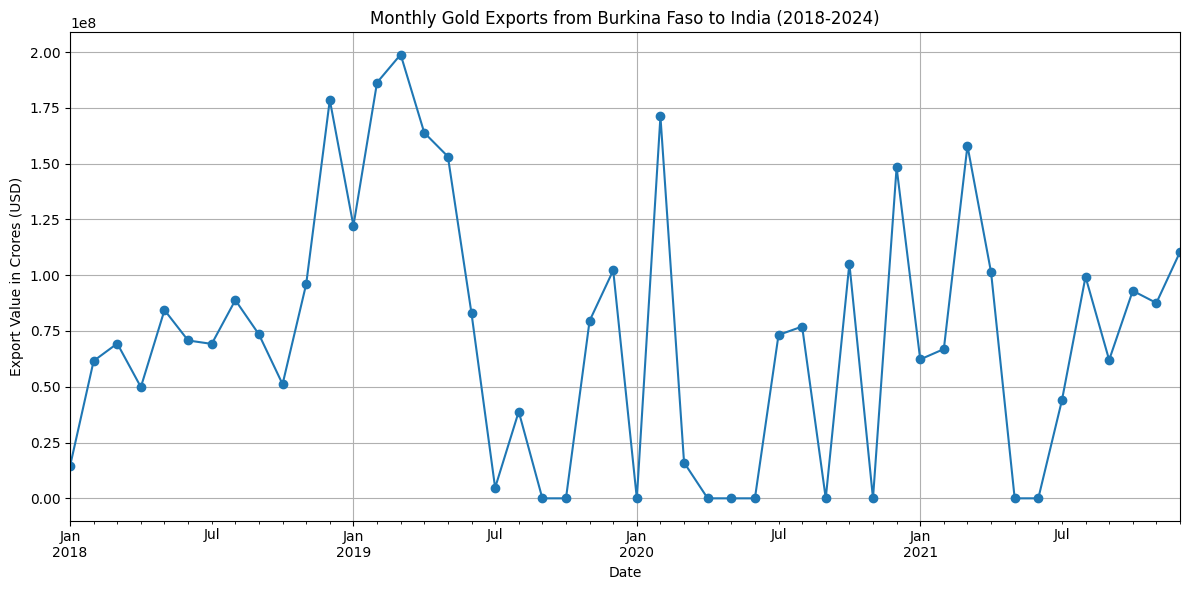

In [ ]:
# Filter for India exports
india_df = df[df['partnerISO'] == 'IND'].copy()
india_monthly = india_df.resample('M', on='date')['primaryValue'].sum()

plt.figure(figsize=(12, 6))
india_monthly.plot(title='Monthly Gold Exports from Burkina Faso to India (2018-2024)', marker='o')
plt.ylabel('Export Value in Crores (USD)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-1524016904.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_group = df.groupby([pd.Grouper(key='date', freq='M'), 'partnerGroup'])['primaryValue'].sum().unstack()


<Figure size 1500x1000 with 0 Axes>

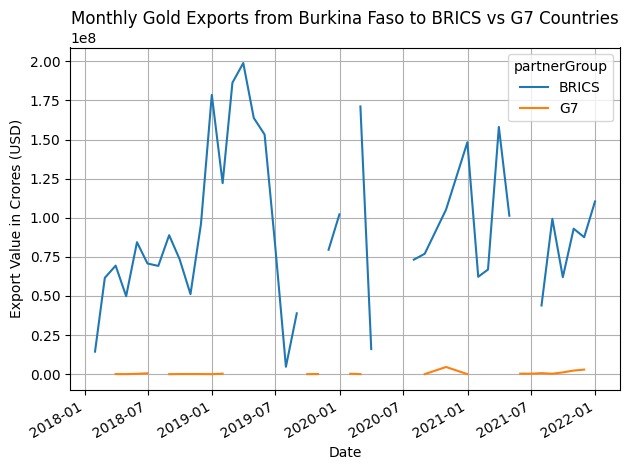

In [ ]:
# Group by month and partner group
monthly_group = df.groupby([pd.Grouper(key='date', freq='M'), 'partnerGroup'])['primaryValue'].sum().unstack()

plt.figure(figsize=(15, 10))
monthly_group.plot(title='Monthly Gold Exports from Burkina Faso to BRICS vs G7 Countries')
plt.ylabel('Export Value in Crores (USD)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

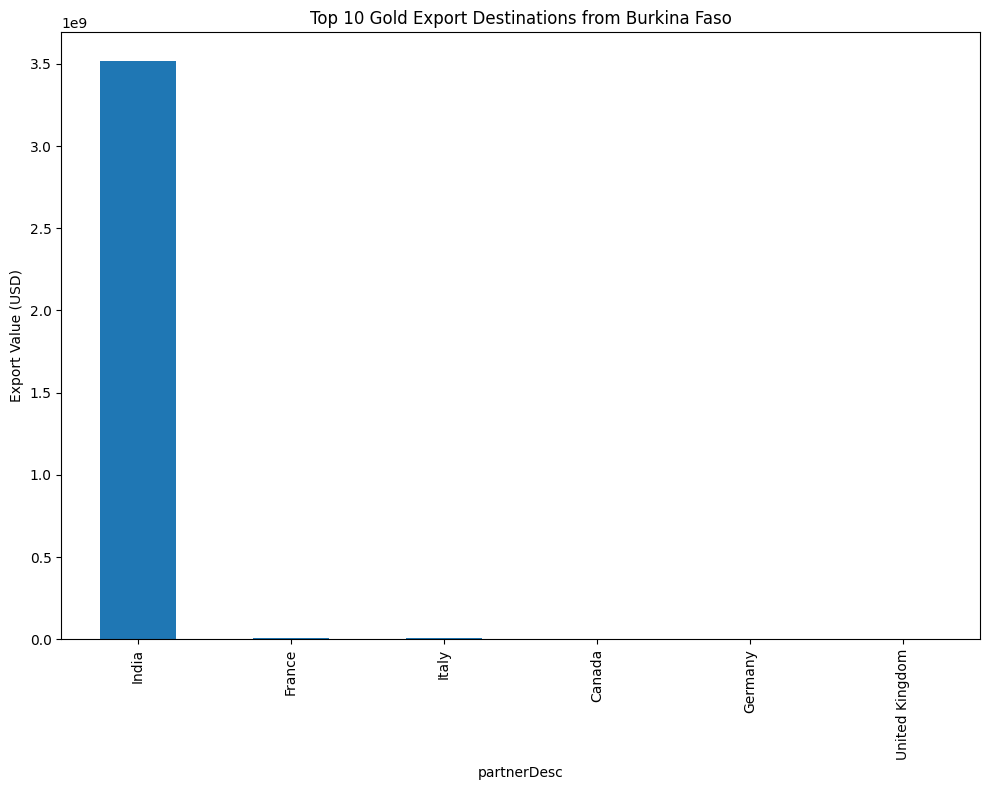

In [ ]:
# Aggregate by country
country_totals = df.groupby('partnerDesc')['primaryValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
country_totals.plot(kind='bar',
                   title='Top 10 Gold Export Destinations from Burkina Faso')
plt.ylabel('Export Value (USD)') # Added y-axis label
plt.tight_layout()
plt.show()

/tmp/ipython-input-18-2361810664.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = country_data.resample('M', on='date')['primaryValue'].sum()
/tmp/ipython-input-18-2361810664.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = country_data.resample('M', on='date')['primaryValue'].sum()


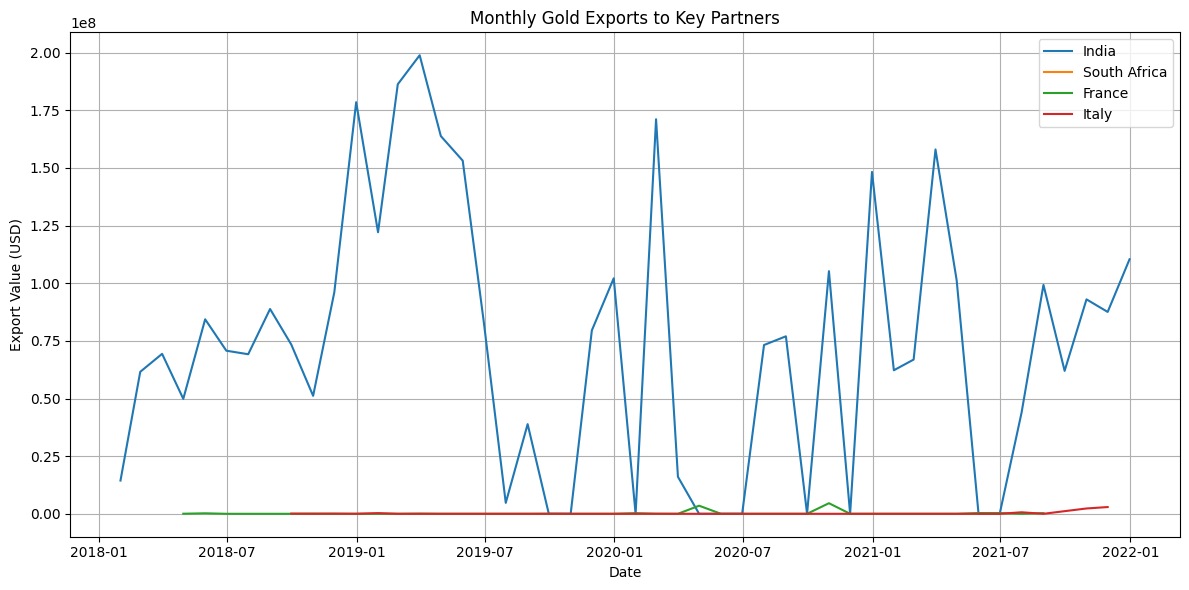

In [ ]:
key_partners = ['India', 'South Africa', 'France', 'Italy']
key_df = df[df['partnerDesc'].isin(key_partners)]

plt.figure(figsize=(12, 6))
for country in key_partners:
    country_data = key_df[key_df['partnerDesc'] == country]
    monthly = country_data.resample('M', on='date')['primaryValue'].sum()
    plt.plot(monthly.index, monthly.values, label=country)

plt.title('Monthly Gold Exports to Key Partners')
plt.ylabel('Export Value (USD)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

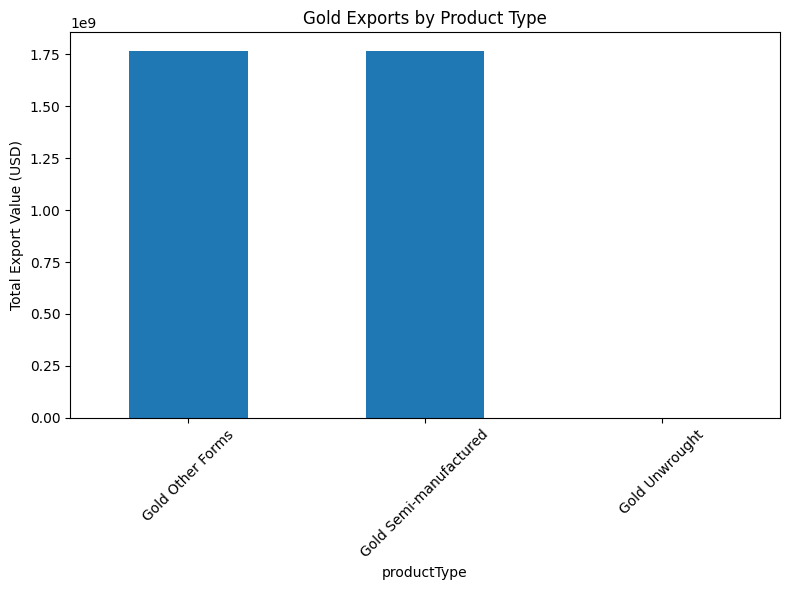

In [ ]:
# Create product categories
def categorize_product(hs_code):
    if hs_code.startswith('710812'):
        return 'Gold Unwrought'
    elif hs_code.startswith('710813'):
        return 'Gold Semi-manufactured'
    else:
        return 'Gold Other Forms'

df['productType'] = df['cmdCode'].astype(str).apply(categorize_product)

# Plot product distribution
product_dist = df.groupby('productType')['primaryValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
product_dist.plot(kind='bar', title='Gold Exports by Product Type')
plt.ylabel('Total Export Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

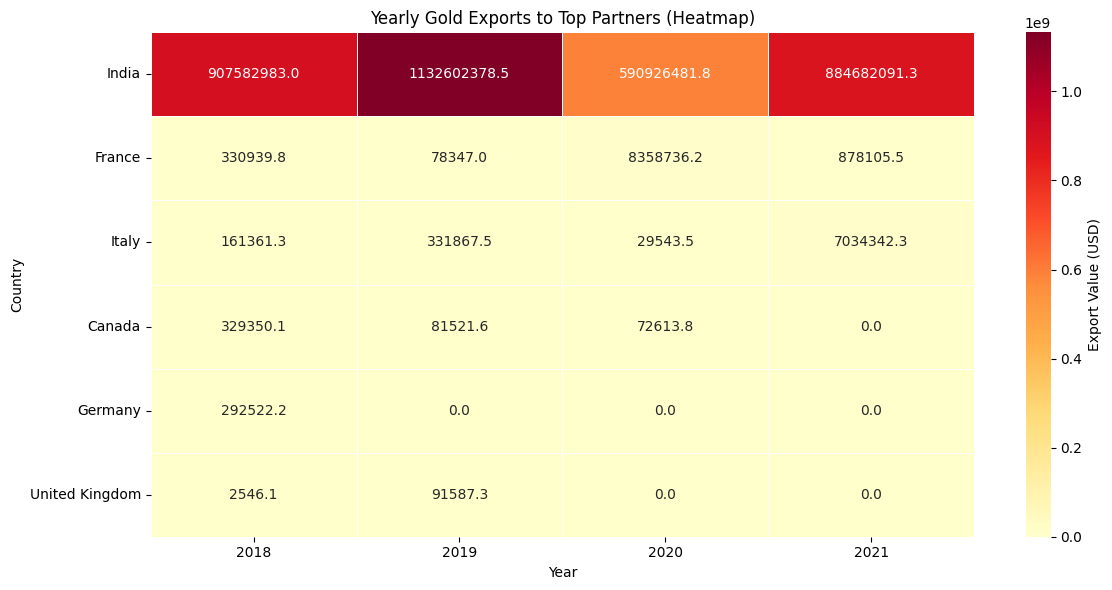

In [ ]:
# Create a pivot table for heatmap
heatmap_data = df.pivot_table(values='primaryValue',
                             index=df['date'].dt.year,
                             columns='partnerDesc',
                             aggfunc='sum',
                             fill_value=0)

# Select top countries for heatmap
top_countries = df.groupby('partnerDesc')['primaryValue'].sum().sort_values(ascending=False).head(8).index
heatmap_data = heatmap_data[top_countries]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap='YlOrRd', annot=True, fmt='.1f',
            linewidths=.5, cbar_kws={'label': 'Export Value (USD)'})
plt.title('Yearly Gold Exports to Top Partners (Heatmap)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

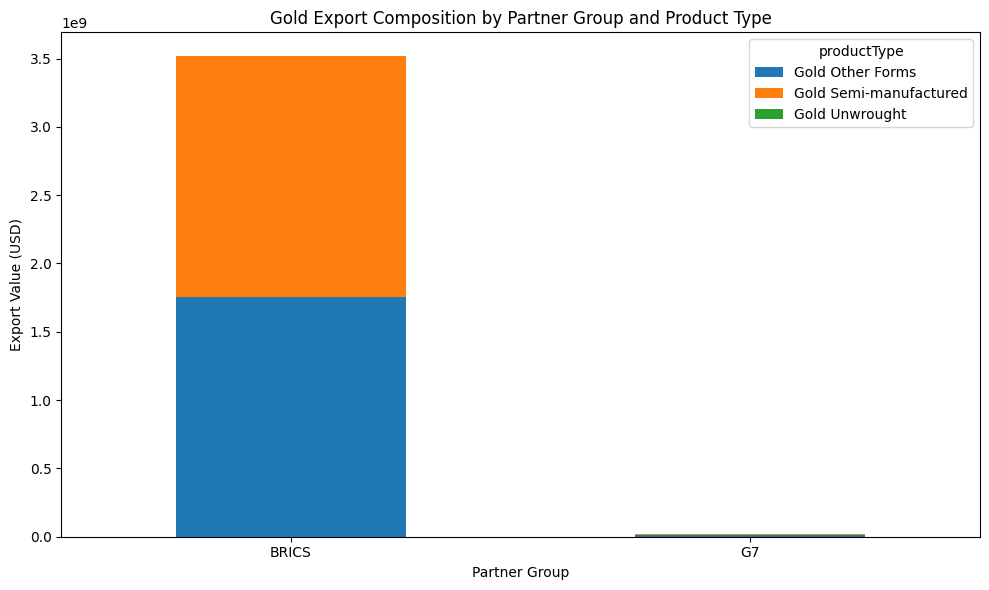

In [ ]:
# Composition by partner group and product type
composition = df.groupby(['partnerGroup', 'productType'])['primaryValue'].sum().unstack()

composition.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gold Export Composition by Partner Group and Product Type')
plt.ylabel('Export Value (USD)')
plt.xlabel('Partner Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Save processed data to new CSV
df.to_csv('processed_burkina_gold_exports.csv', index=False)
print("Processed data saved to 'processed_burkina_gold_exports.csv'")

Processed data saved to 'processed_burkina_gold_exports.csv'
